# Brain Stroke Prediction

# Implementations -
### Part A. Exploratory Data Analysis (EDA)
### Part B. Applying Different Algorithms
### 1.) K-Nearest Neibours Algorithm (KNN)
### 2.) Decision Tree Classifier
### 3.) Logistic Regression
### 4.) Support Vector Machine (SVM)
### 5.) Random Forest Classifier
### 6.) XGBoost Classifier

# Importing Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random 
import csv
import pandas as pd
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
import seaborn as sns
import os

# Stroke-Dataset

In [3]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv') # reading the dataset
stroke_data.sample(15) # getting Sample of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
186,16077,Male,63.00,0,1,Yes,Self-employed,Urban,116.69,34.5,formerly smoked,1
1758,27279,Male,1.72,0,0,No,children,Urban,90.46,22.5,Unknown,0
4615,69972,Female,55.00,0,0,Yes,Private,Rural,56.11,32.4,formerly smoked,0
299,8831,Female,58.00,0,0,Yes,Private,Rural,94.30,29.1,Unknown,0
3144,3442,Female,79.00,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4092,49901,Male,55.00,0,0,Yes,Govt_job,Urban,154.03,31.6,smokes,0
2872,42284,Male,71.00,1,0,Yes,Self-employed,Rural,97.57,26.9,Unknown,0
4422,1847,Female,20.00,0,0,No,Govt_job,Rural,79.53,NaN,never smoked,0
2642,32183,Female,67.00,0,0,Yes,Private,Rural,66.08,36.2,never smoked,0
733,9612,Male,6.00,0,0,No,children,Urban,70.78,20.3,Unknown,0


# Context


According to the World Health Organisation (WHO), stroke is the world's second biggest cause of death, accounting for around 11% of all deaths.
Based on input criteria such as gender, age, various diseases, and smoking status, this dataset is used to predict whether a patient is likely to have a stroke. Each row of data contains pertinent information about the patient.


# Attribute Information:

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [4]:

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the model output for the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Now apply the plotting function to all models
# Example for KNN model after fitting:
# plot_decision_boundary(knn_model, X_train, y_train, title="KNN Decision Boundary")


# Cleaning the dataset

In [5]:
stroke_data.drop(['id'], axis = 1, inplace = True) # removing the 'id' column
stroke_data.describe() # description of the dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Handling missing values

In [6]:
stroke_data.isnull().sum() # getting number of missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# We can replace the null values of 'bmi' with median in that column.
stroke_data.bmi.replace(to_replace=np.nan, value=stroke_data.bmi.median(), inplace=True)

## Performing EDA(Exploratory Data Analysis)

In [8]:
df = pd.DataFrame({'Stroke: Yes':[1], 
                    'Stroke: No':[0]}, index = ['Label'])
display(df)

,Stroke: Yes,Stroke: No
Label,1,0


# Plots for class counts

,Stroke: No,Stroke: Yes
Count,249,4861


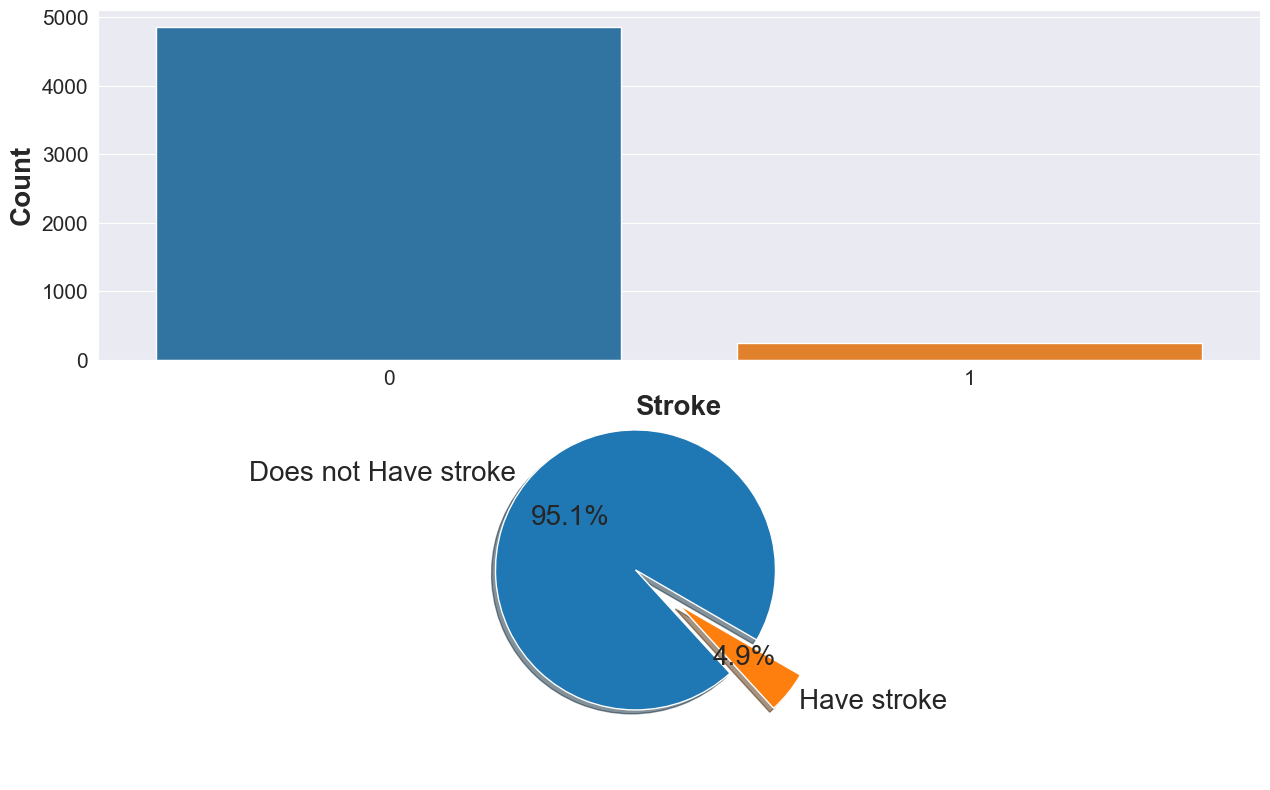

In [9]:
labels = ['Does not Have stroke', 'Have stroke']
counts = [stroke_data['stroke'].value_counts()[0], 
          stroke_data['stroke'].value_counts()[1]]

df_count = pd.DataFrame({'Stroke: No':counts[1],
                    'Stroke: Yes':counts[0]}, index = ['Count'])


fig1 = plt.figure(figsize = (15, 10))
ax1 = fig1.add_subplot(2,1,1)
sns.countplot(data = stroke_data, x = 'stroke')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Stroke', size = 20, weight = 'bold')
plt.ylabel('Count', size = 20, weight = 'bold')

ax2 = fig1.add_subplot(2,1,2)
ax2.pie(counts,explode = [0.4,0], labels = labels, autopct = '%1.1f%%', 
        shadow = True, startangle = -30, textprops = {'fontsize':20})
display(df_count)

#### It is clear that the dataset is very imbalanced.

In [10]:
# Separating categorical and Continuous features
cont = ['age', 'avg_glucose_level', 'bmi']
cat = [ 'gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status']

conversions = {'Male':0, 'Female':1, 'Other':2, 
               'No':0, 'Yes':1, 
               'Private':0, 'children': 1, 'Govt_job':2, 'Never_worked':3, 'Self-employed':4,
               'Rural':0, 'Urban':1,
               'smokes':0, 'Unknown':1, 'never smoked':2, 'formerly smoked':3}


stroke_data.replace(conversions, inplace = True)
strokedf = stroke_data.copy()

### Histograms for continous variables

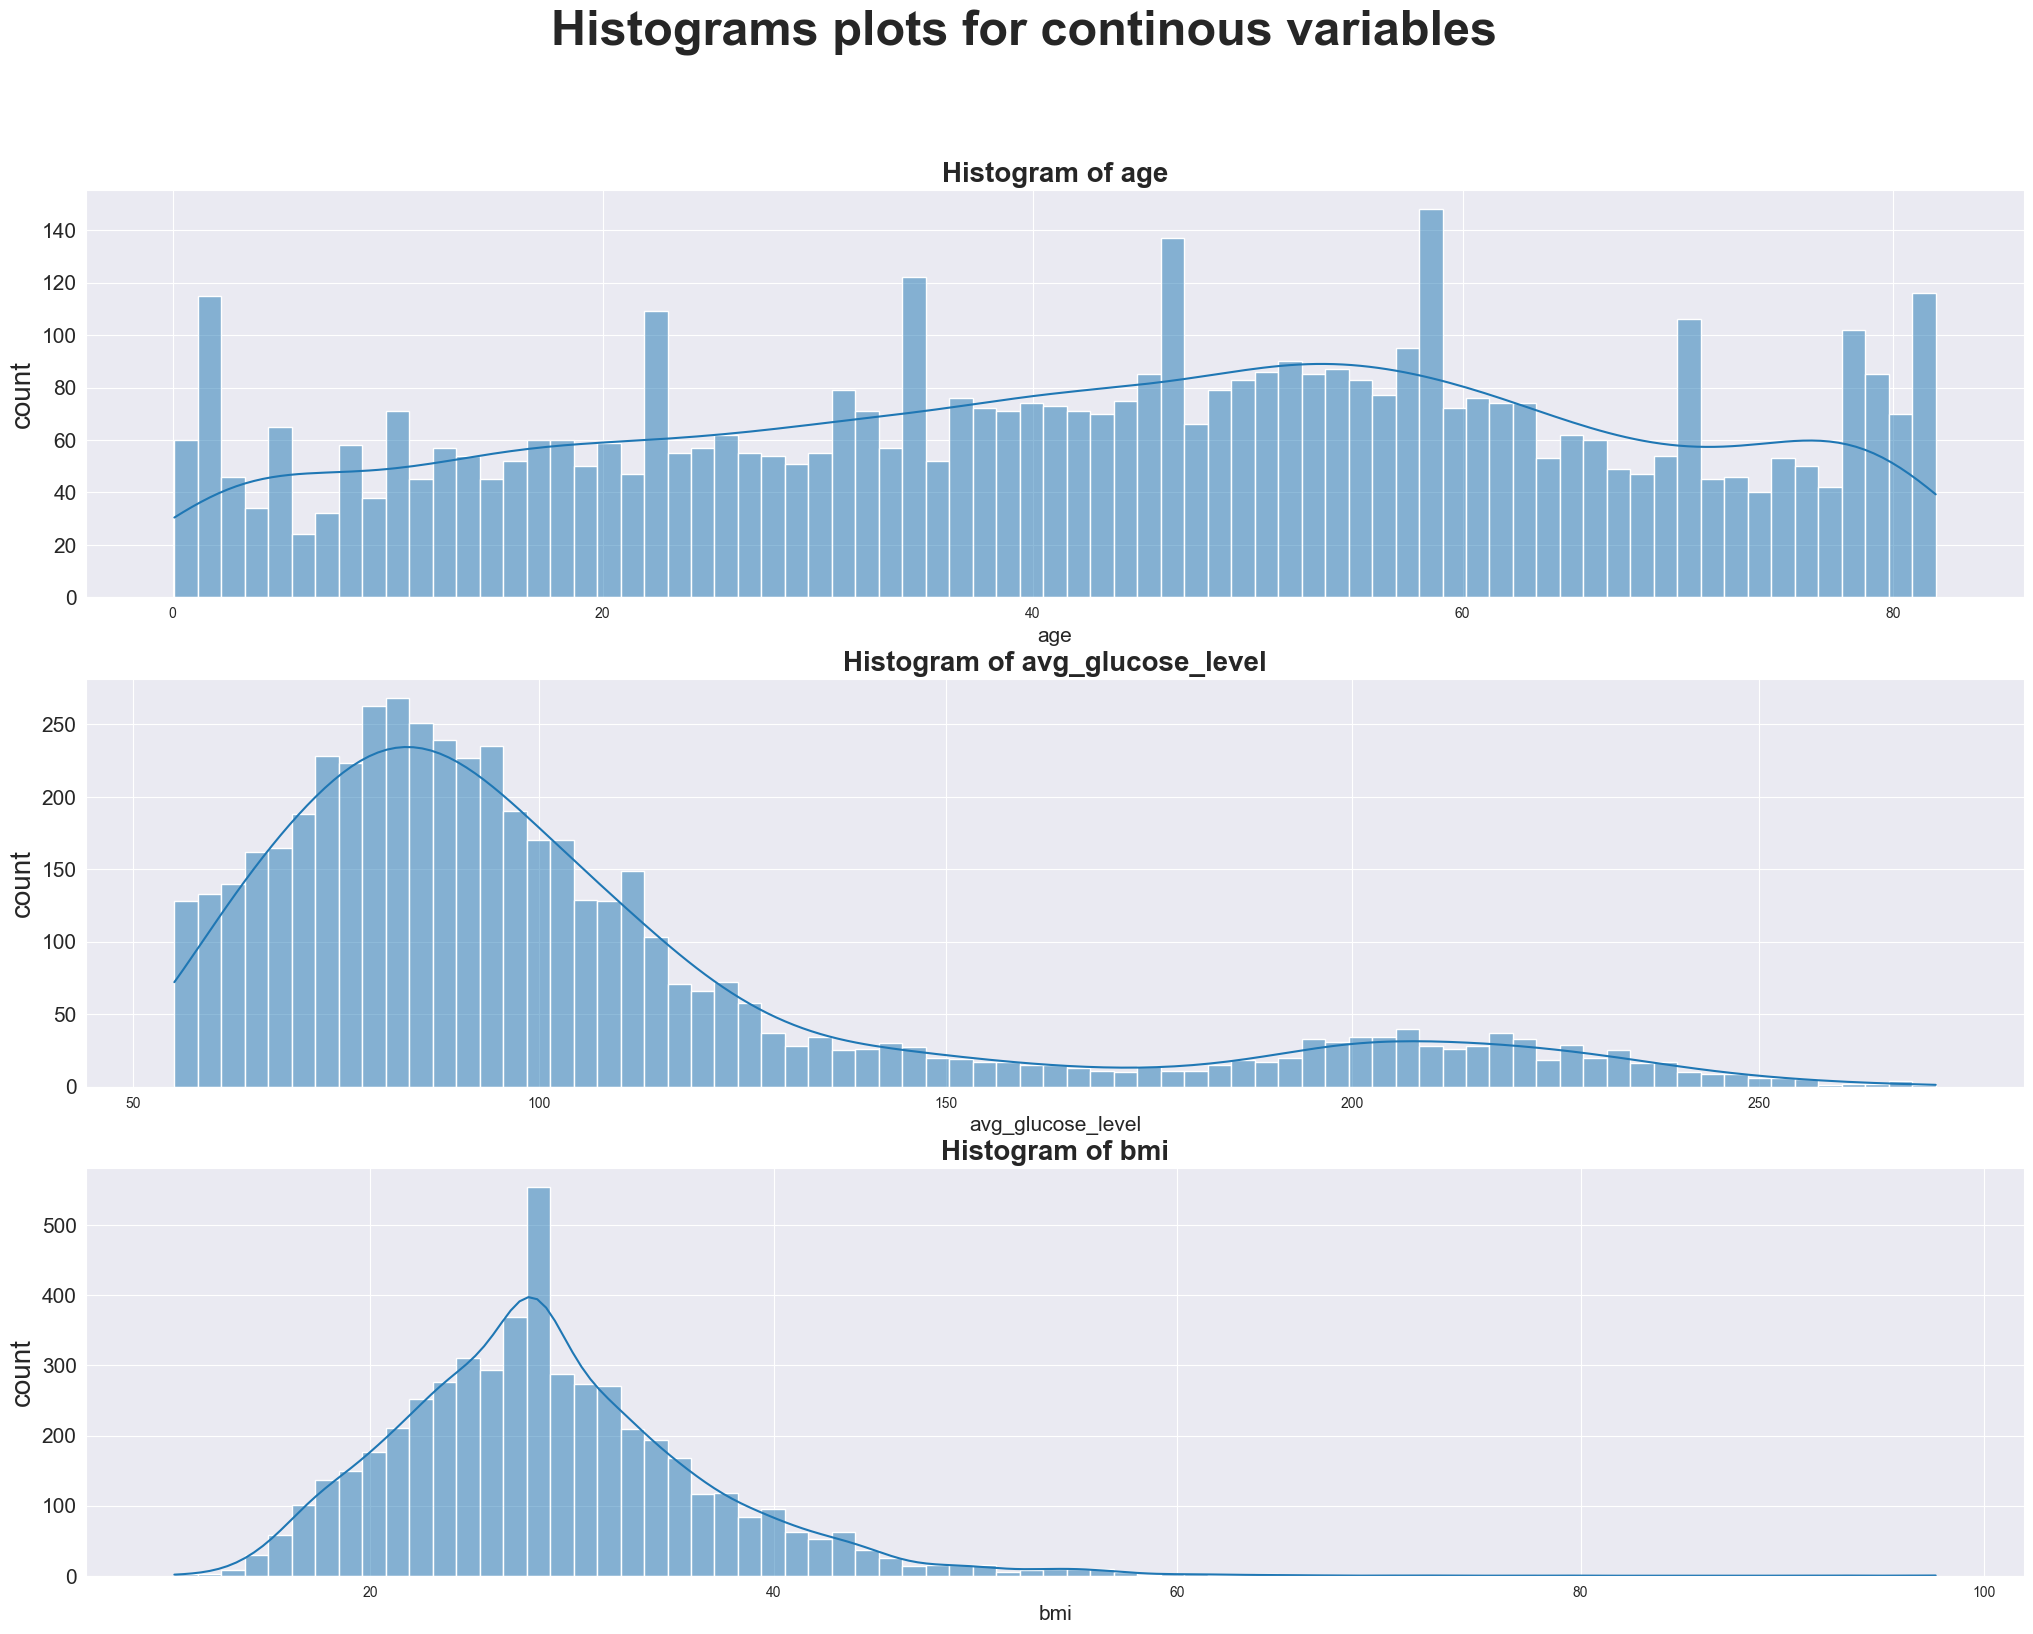

In [11]:
fig5 = plt.figure(figsize = (25,18))
fig5.suptitle('Histograms plots for continous variables', size = 35, weight = 'bold')

for i in range(len(cont)):
    fig5.add_subplot(len(cont), 1, i+1)
    plt.title(f'Histogram of {cont[i]}', weight = 'bold',size = 20)
    plt.xlabel(cont[i], size = 15)
    plt.ylabel('count', size = 20)
    plt.yticks(size = 15)
    sns.histplot(strokedf[cont[i]], bins = 75, kde = 50)


### Kernel Density Estimate plots for continous variables

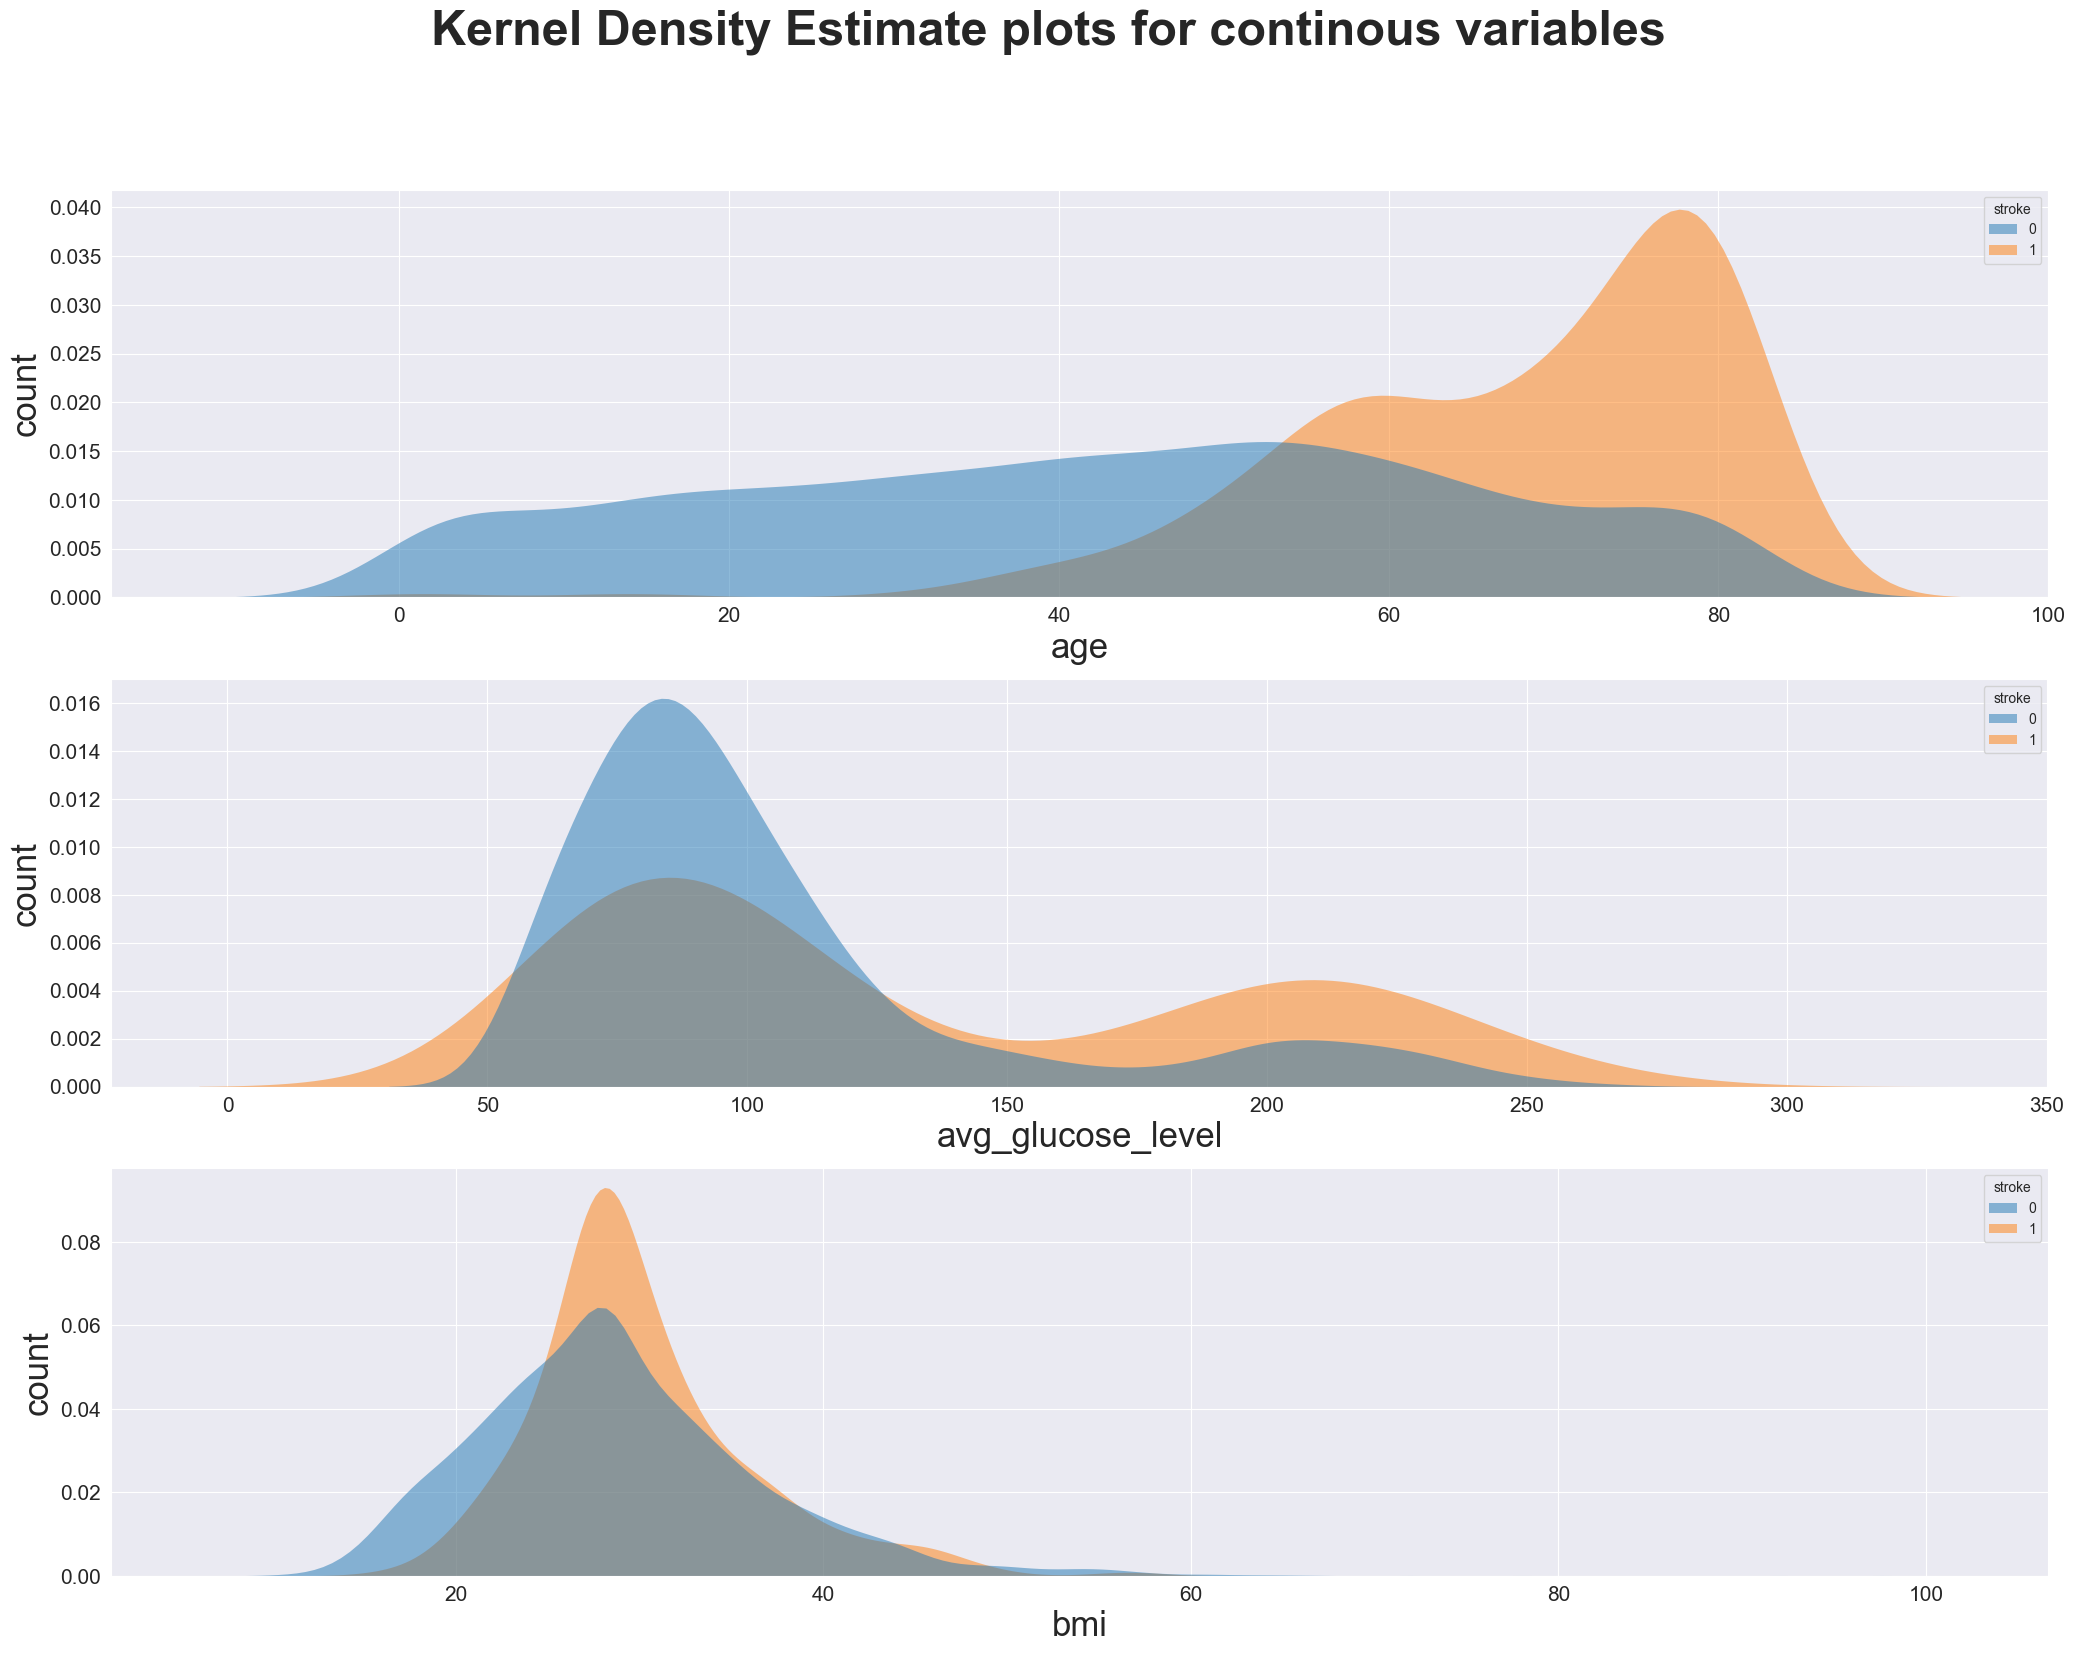

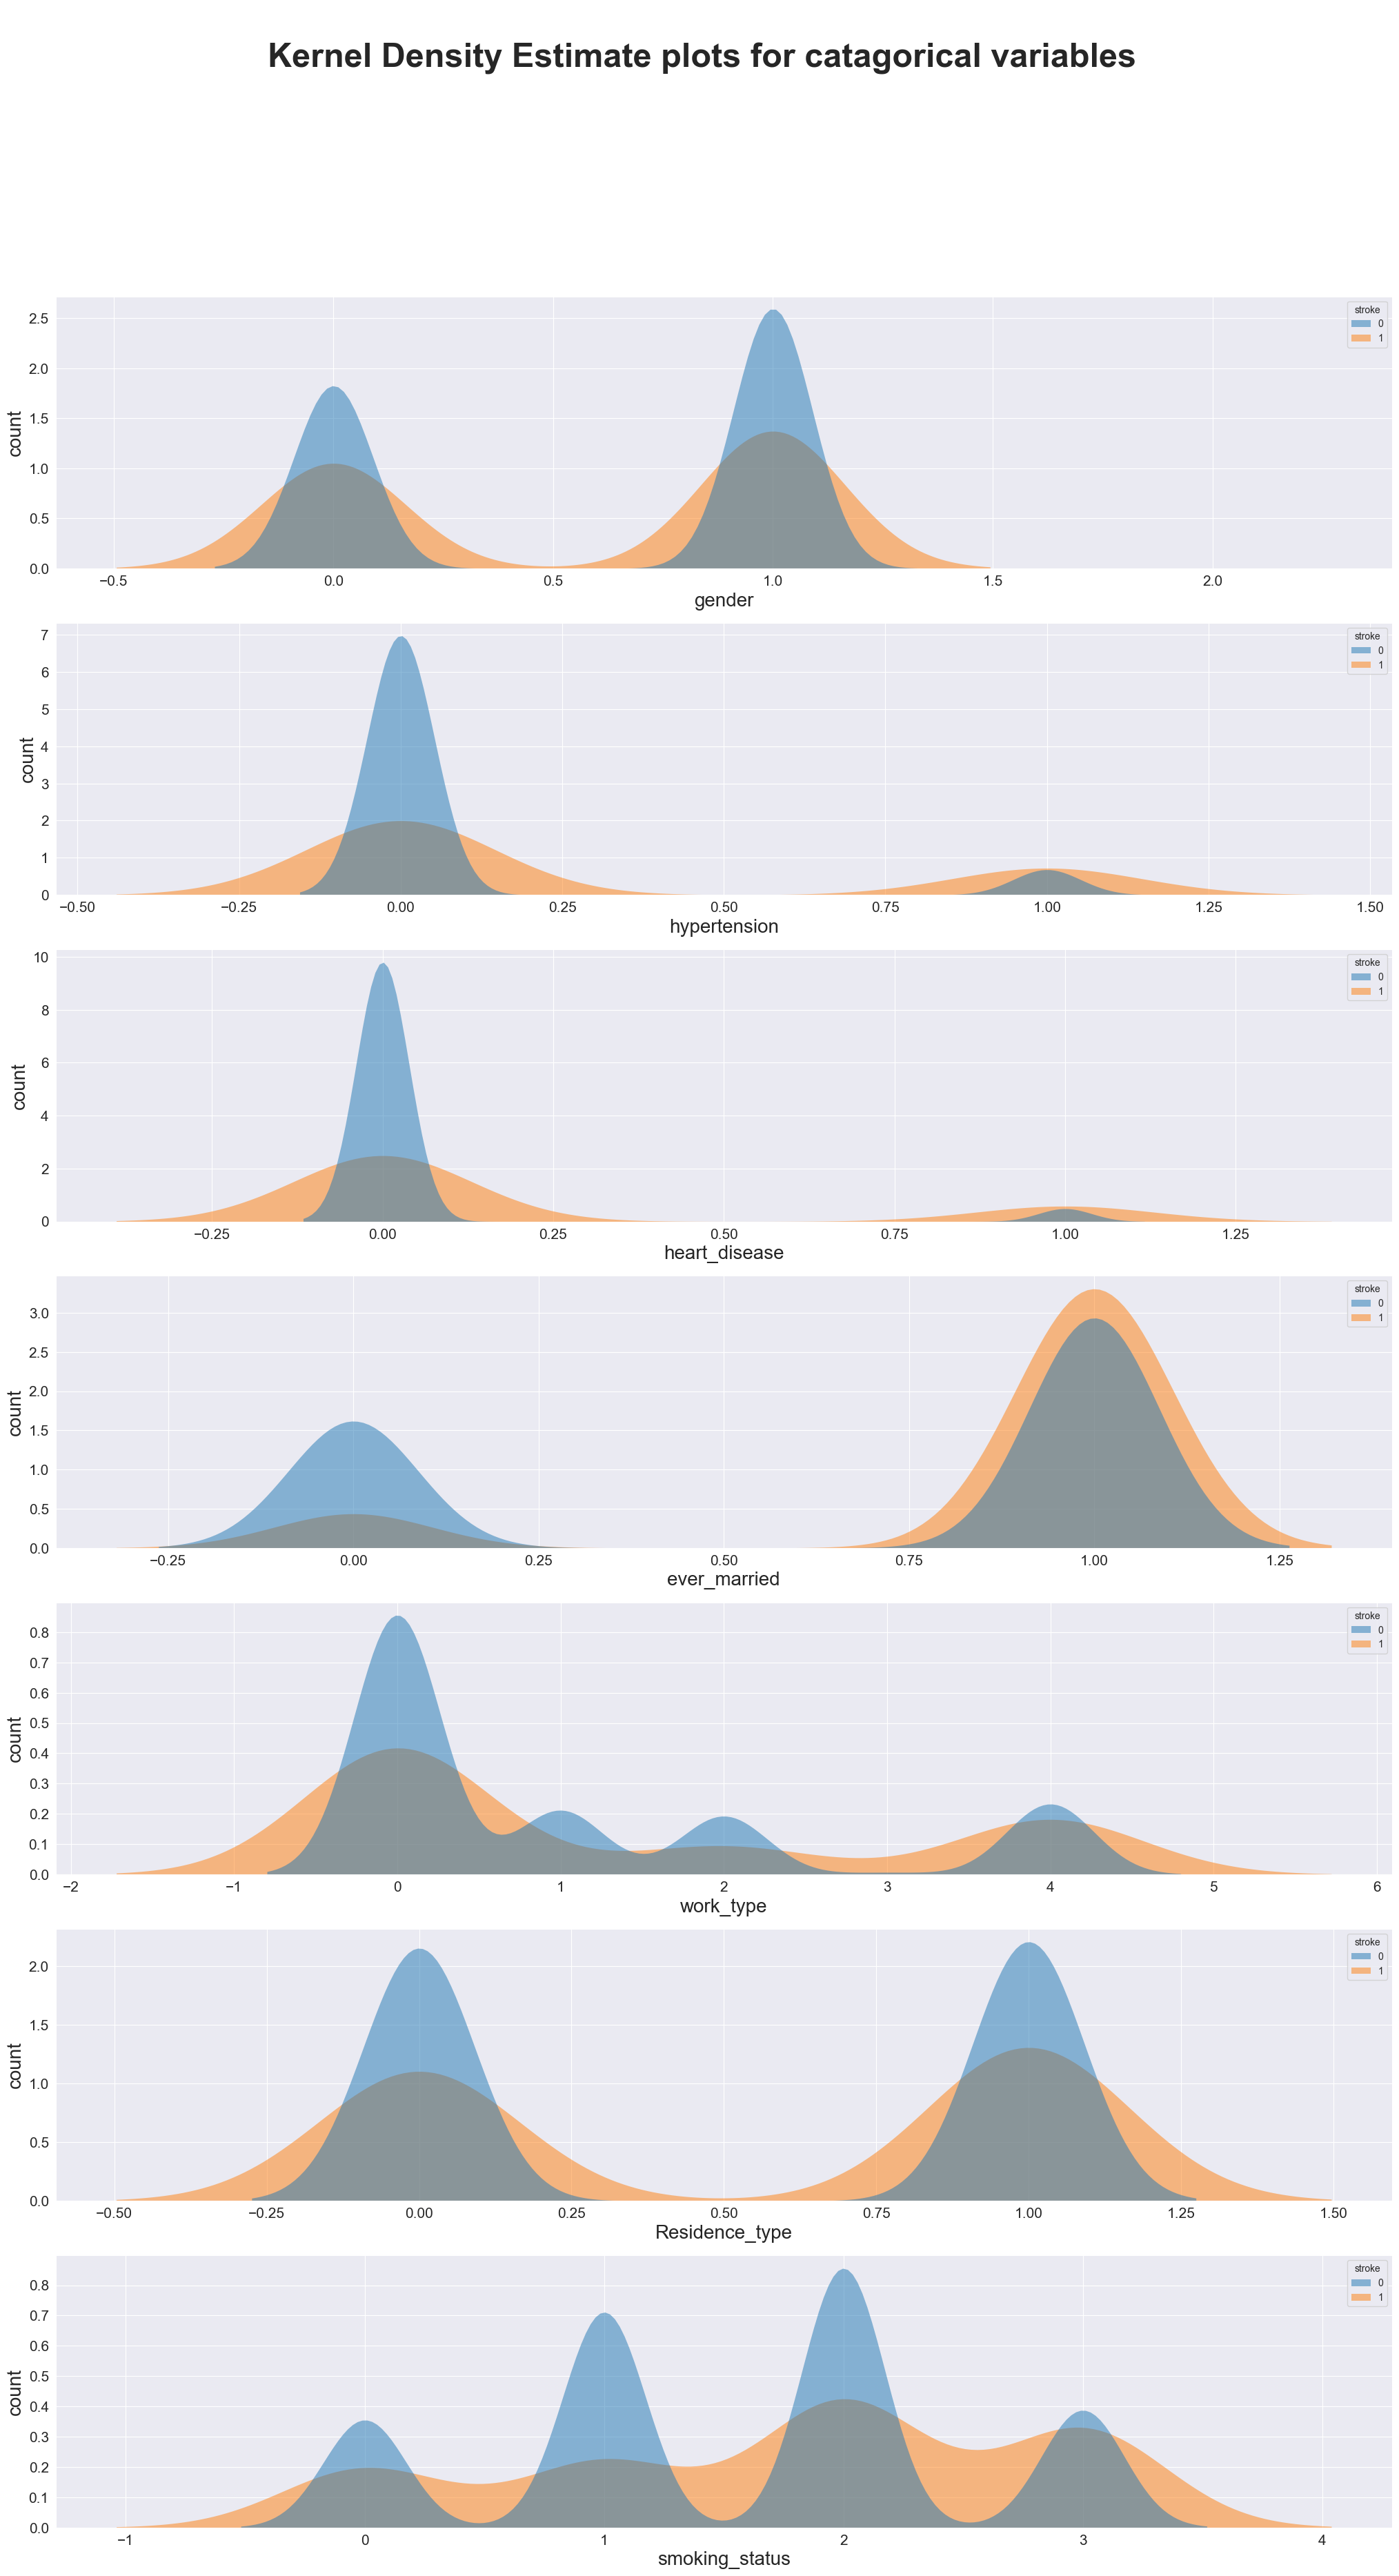

In [12]:
fig3 = plt.figure(figsize = (25,18))
fig3.suptitle('Kernel Density Estimate plots for continous variables', size = 35, weight = 'bold')
for i in range(len(cont)):
    fig3.add_subplot(len(cont),1,i+1)
    plt.xlabel(cont[i] ,size = 25)
    plt.ylabel('count',size = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cont[i], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

fig4 = plt.figure(figsize = (25,42))
fig4.suptitle('\nKernel Density Estimate plots for catagorical variables', size = 35, weight = 'bold')

for j in range(len(cat)) :
    fig4.add_subplot(len(cat),1, j+1)
    plt.xlabel(cat[j], size = 20)
    plt.ylabel('count', size = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cat[j], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

### Bar plots for Catagorical data

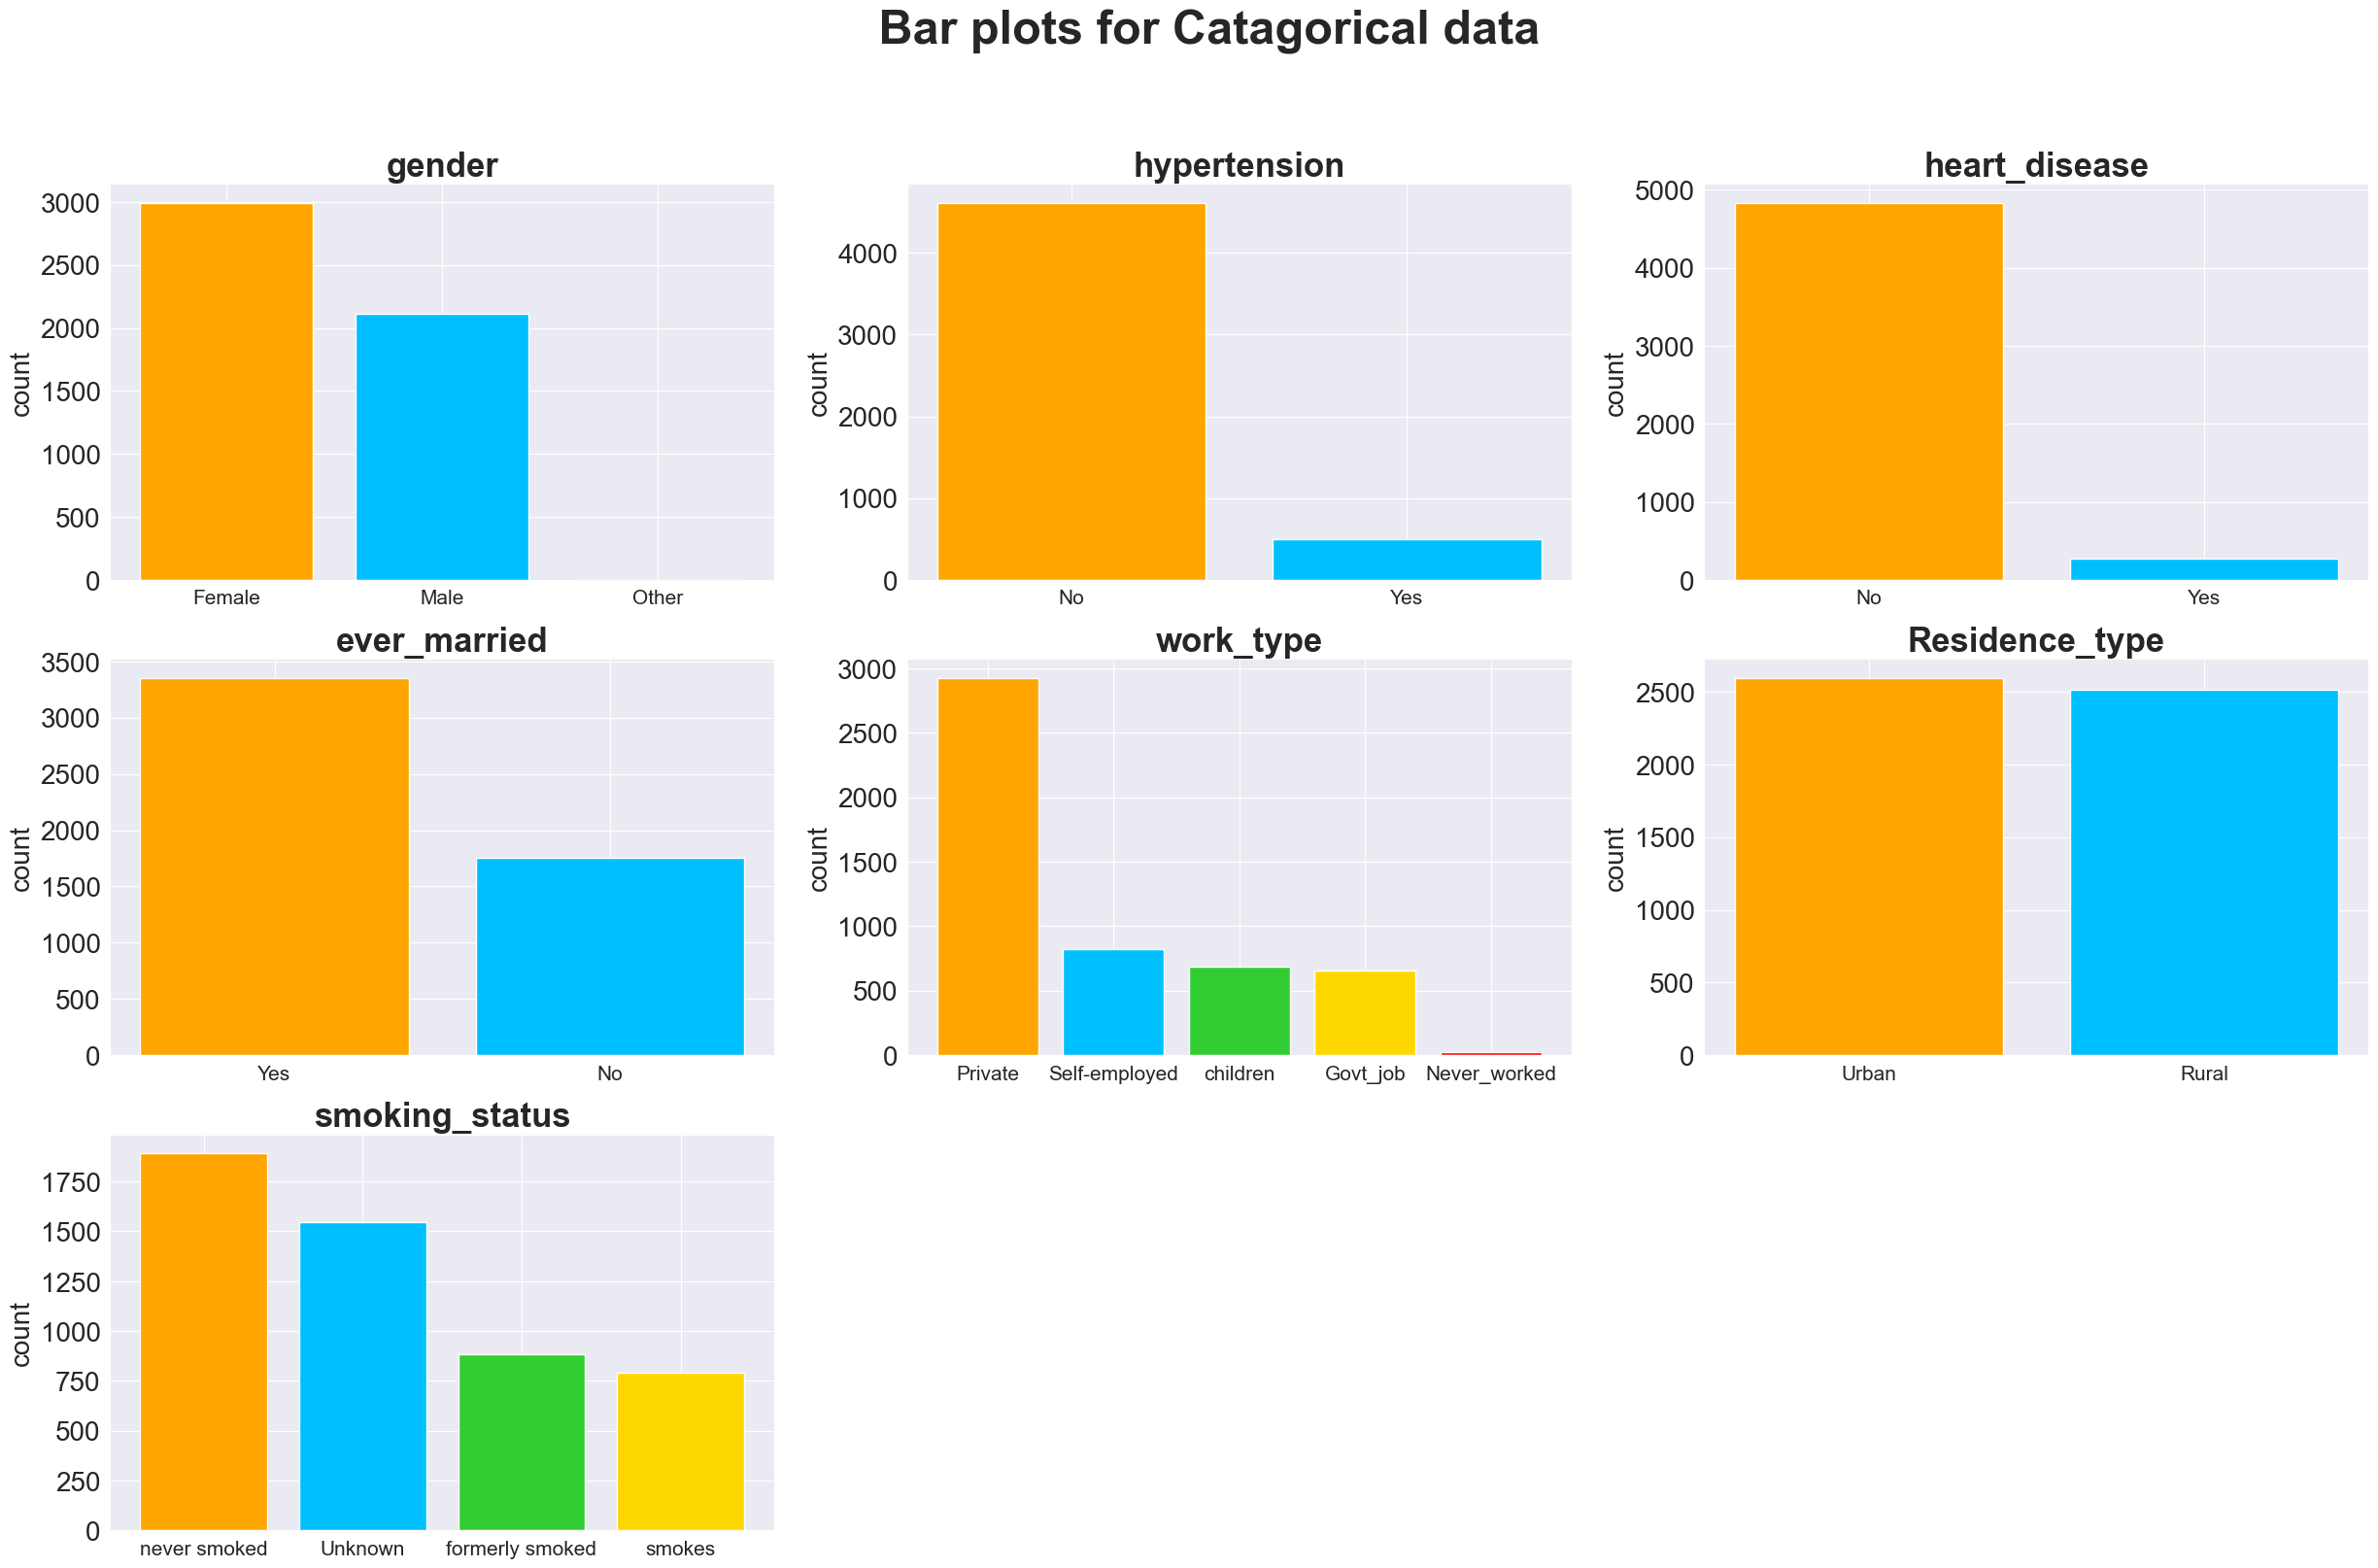

In [13]:
# X labels for plots
xlabs = {'gender': ['Male', 'Female', 'Other'],
          'hypertension':['No', 'Yes'],
         'heart_disease':['No', 'Yes'],
         'ever_married': ['No', 'Yes'],
         'work_type': ['Private', 'children', 'Govt_job', 'Never_worked', 'Self-employed' ],
         'Residence_type':['Rural','Urban'],
         'smoking_status':['smokes', 'Unknown', 'never smoked', 'formerly smoked']}

# Plotting the bar charts for catagorical data
fig2 = plt.figure(figsize=(30,18))
fig2.suptitle(' Bar plots for Catagorical data', size = 35, weight = 'bold')
for i in range(len(cat)):
    x_names = [xlabs[cat[i]][x] for x in strokedf[cat[i]].value_counts().index]
    y = strokedf[cat[i]].value_counts().values
    fig2.add_subplot(3,3,i+1)
    plt.title(cat[i],weight = 'bold',size = 25)
    plt.ylabel('count', size = 20)
    plt.bar(x_names, y, color = ['orange','deepskyblue','limegreen','gold','red'] )
    plt.xticks(size = 15)
    plt.yticks(size = 20)

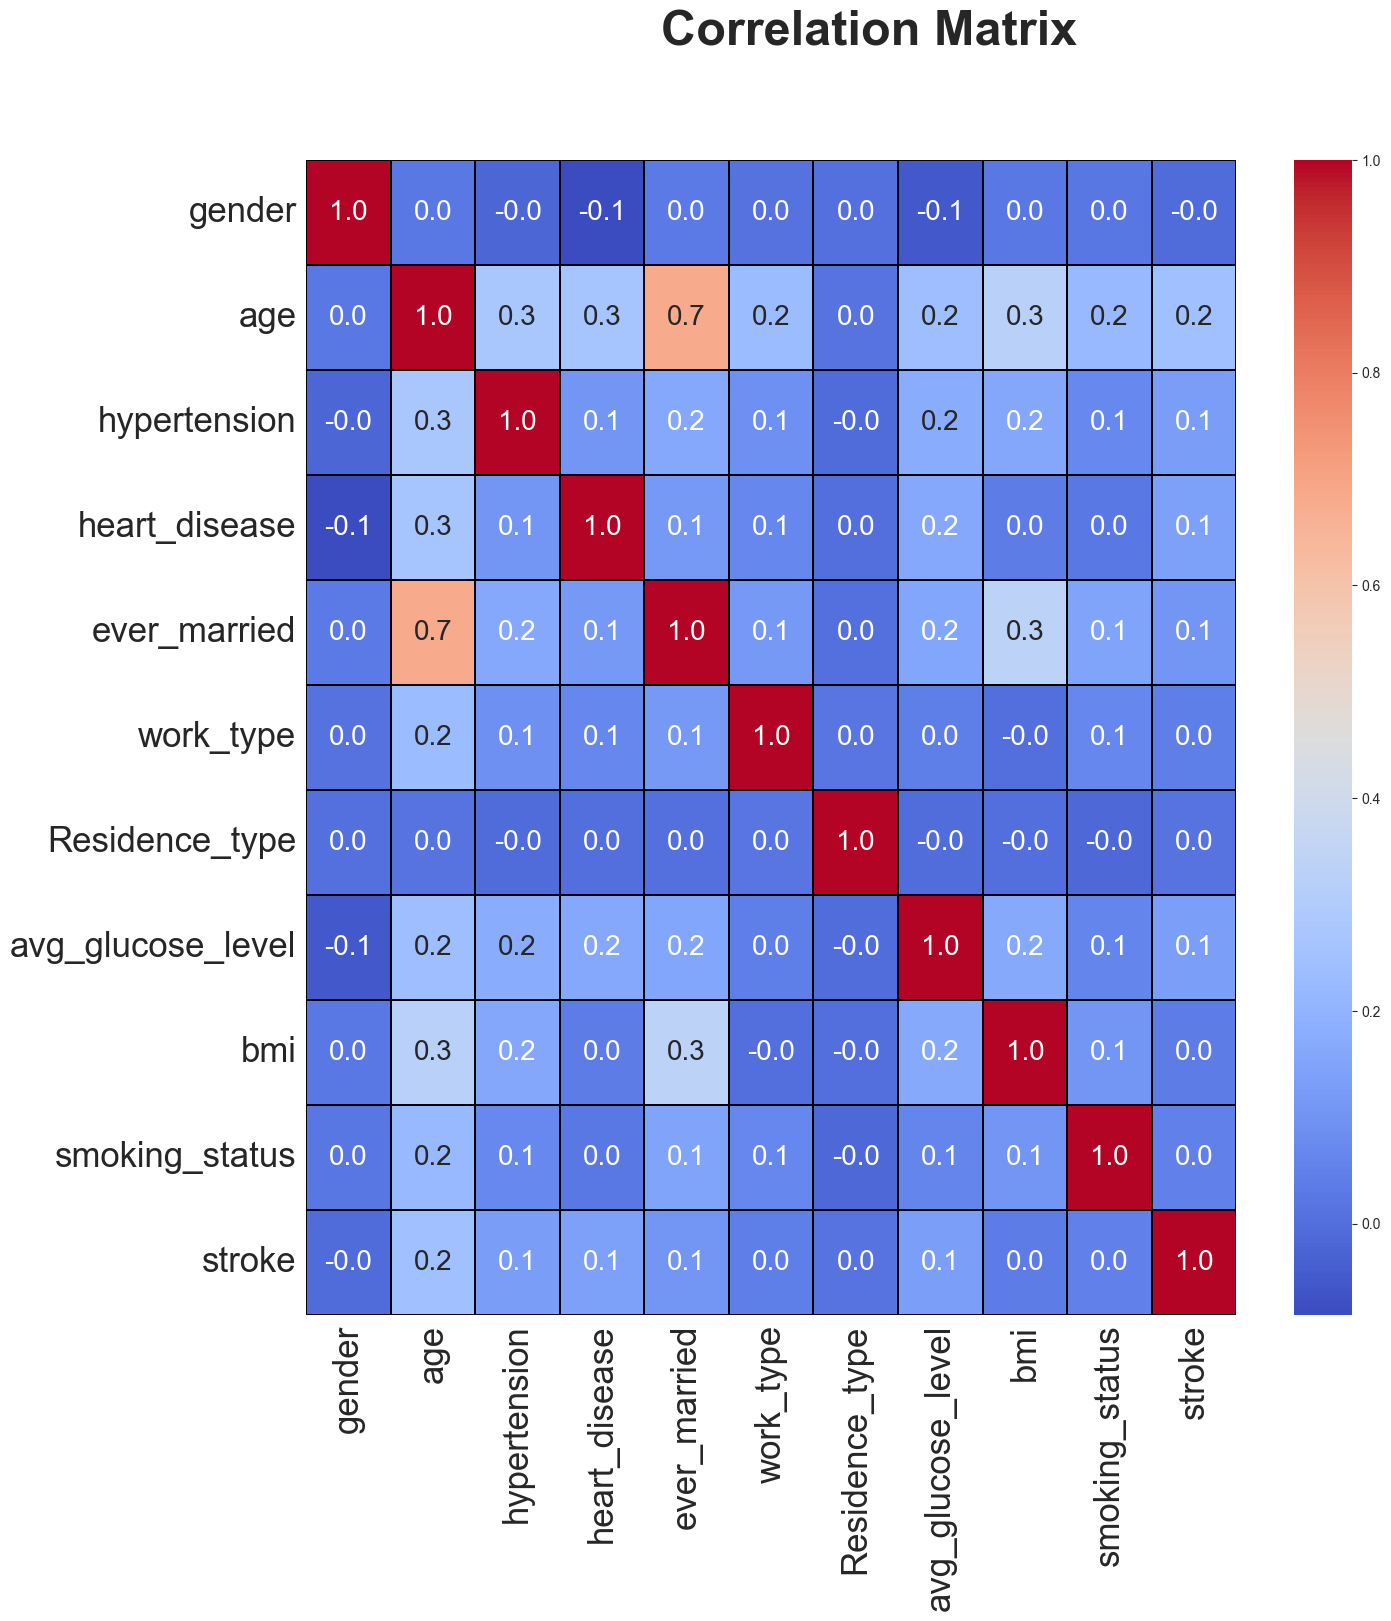

In [14]:
fig6 = plt.figure(figsize = (15, 15))
fig6.suptitle('Correlation Matrix', size=35, weight = 'bold')

sns.heatmap(strokedf.corr(), cmap = "coolwarm",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()

#### From above correleation matrix, we can say that the variable are loosely correlated with each other.

### PAIRPLOT

PAIRPLOT


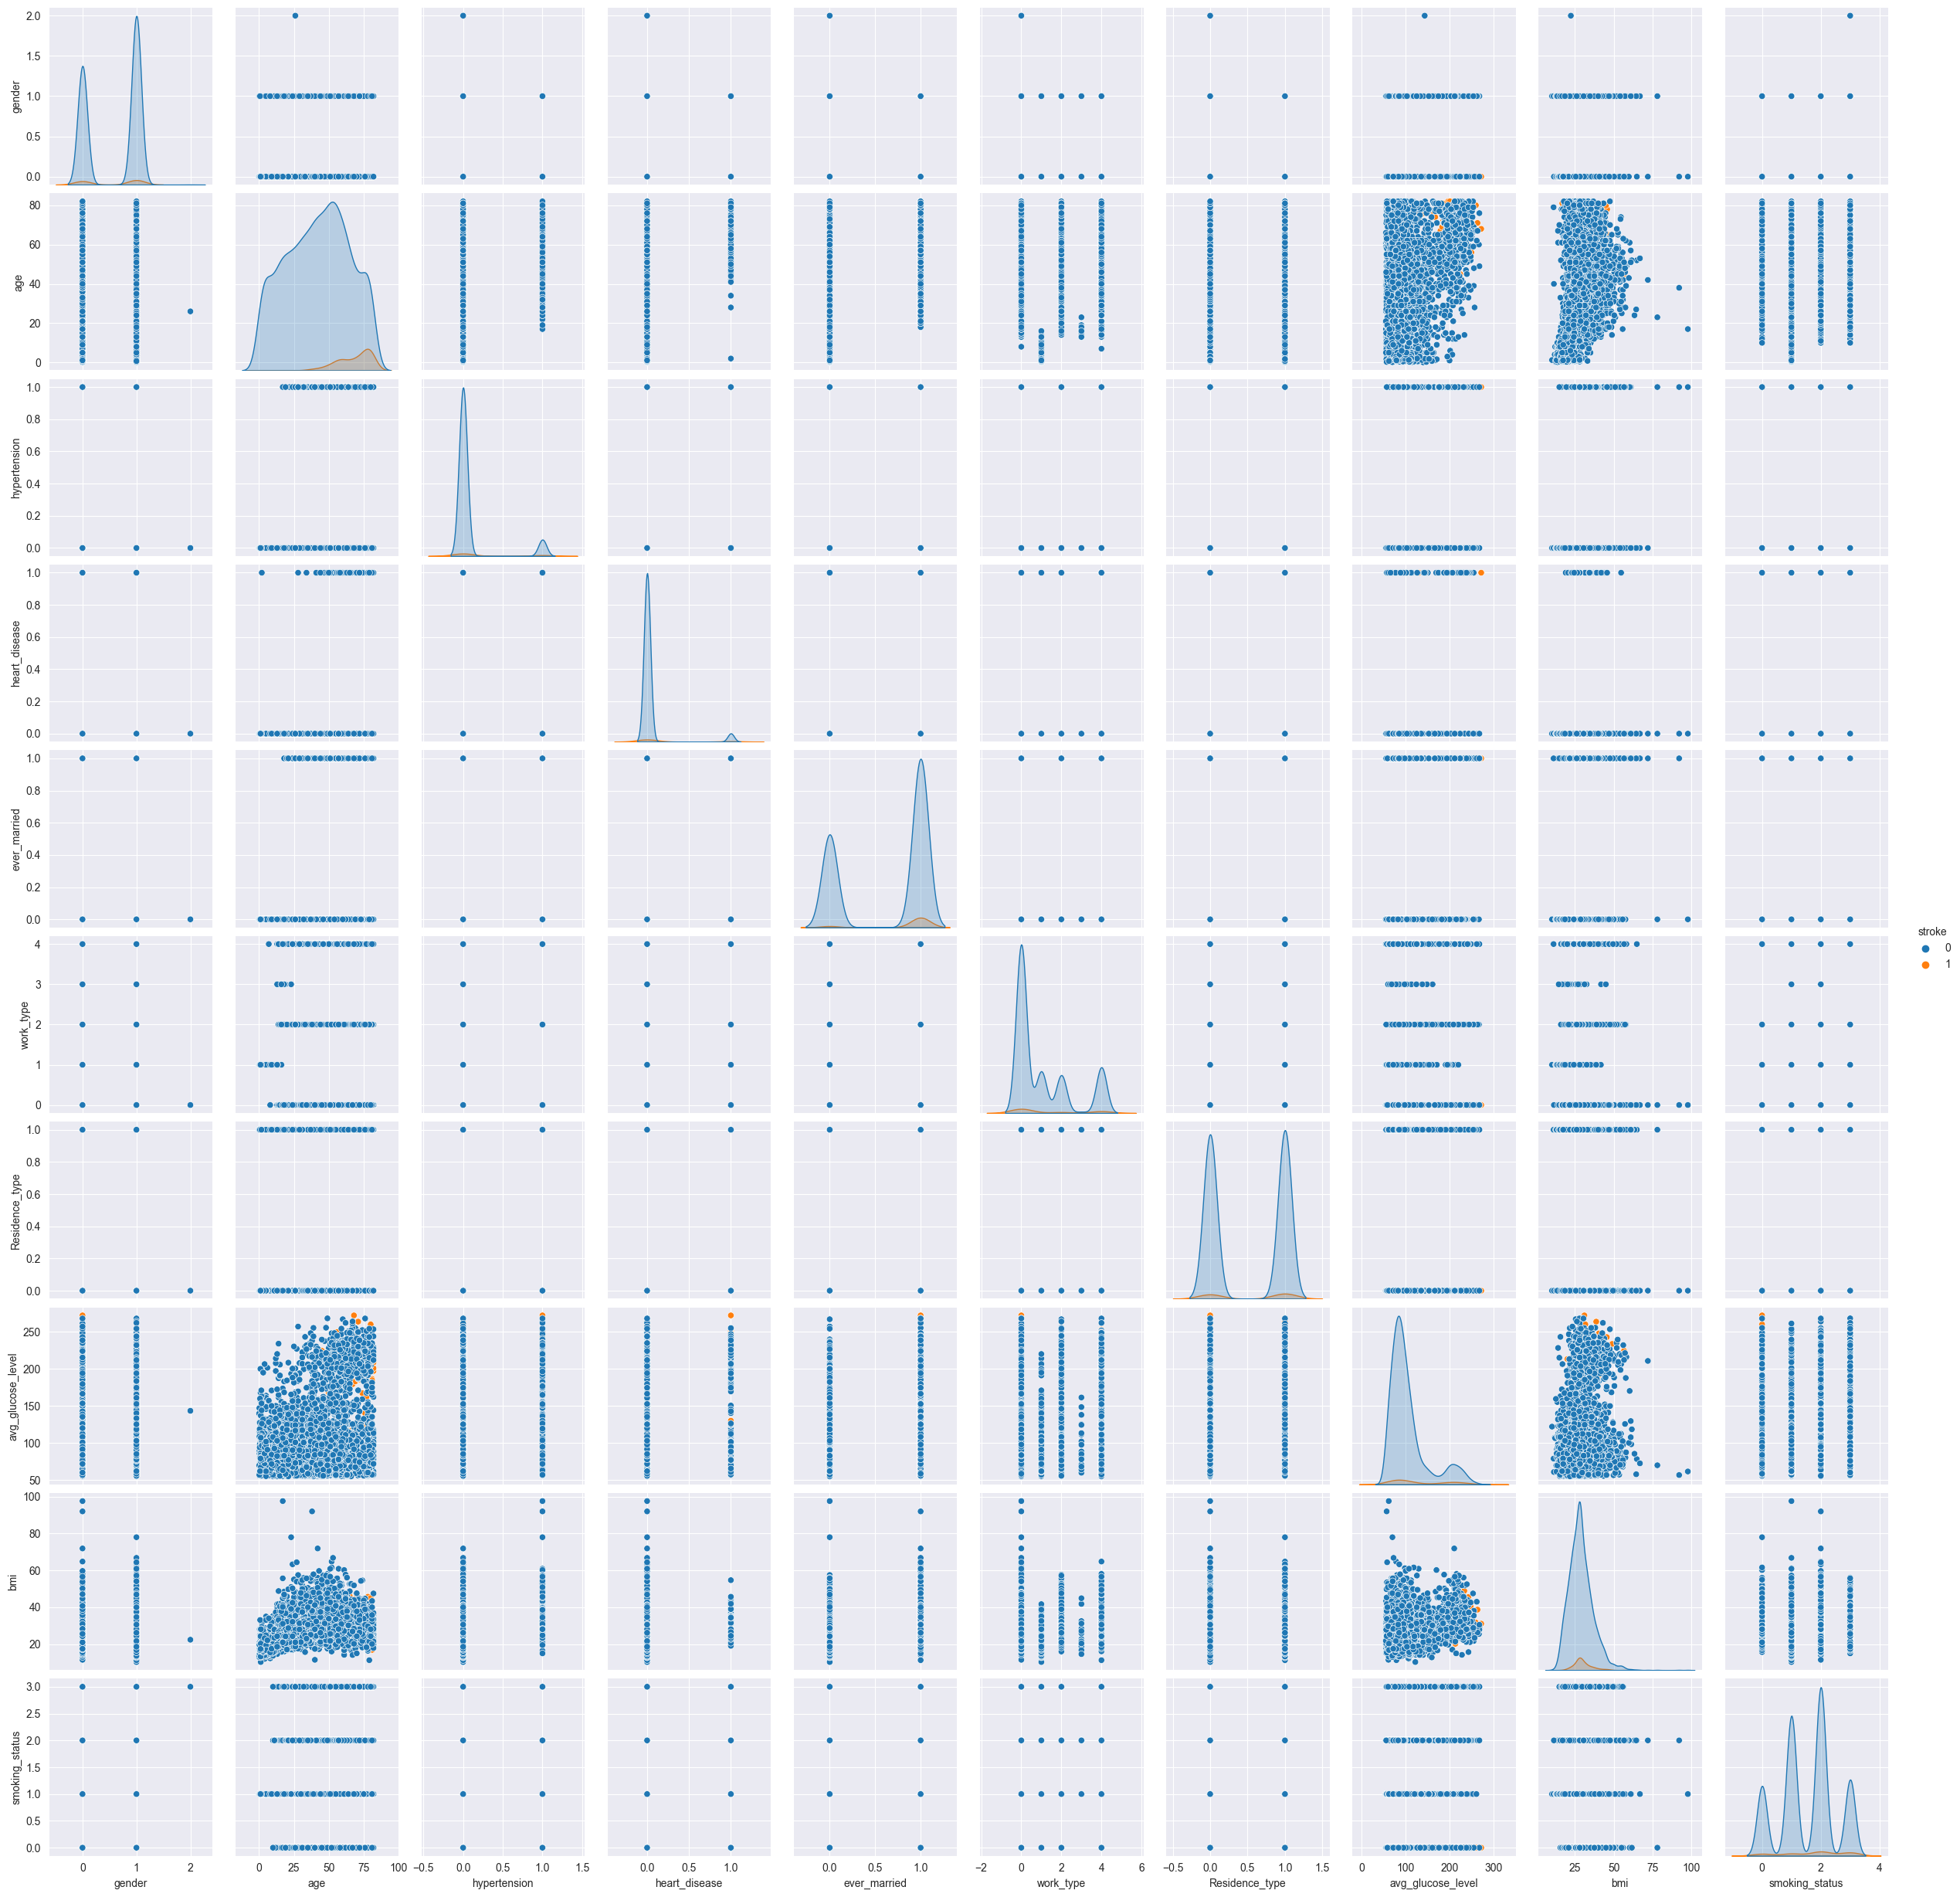

In [15]:
print('PAIRPLOT')
sns.pairplot(strokedf,vars=strokedf.columns[:-1], hue='stroke')
plt.show()

## Data Preprocessing

In [16]:
strokedf.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:

# Encoding categorical Variables
strokedf = pd.get_dummies(strokedf, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [18]:
# separating X and y
X = strokedf.drop(['stroke'], axis=1)
y = strokedf['stroke']

#### Splitting the dataset into train and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

#### Resampling the dataset using SMOTE

In [20]:
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [21]:
print("Before resampling")
y_train.value_counts()

Before resampling


stroke
0    3901
1     187
Name: count, dtype: int64

In [22]:
print("After resampling")
y_train_sm.value_counts()

After resampling


stroke
0    3901
1    3901
Name: count, dtype: int64

In [23]:
# A function to calculate scores and confusion matrix.

def scores( y_test, y_preds):
    accuracy = round(accuracy_score(y_test, y_preds) * 100,3) 
    recall = round(recall_score(y_test, y_preds) * 100,3)
    precision = round(precision_score(y_test, y_preds) * 100,3) 
    f1 = round(f1_score(y_test, y_preds) * 100,3) 
    cm = confusion_matrix(y_test, y_preds)
    cmdf = pd.DataFrame(cm, columns = ['Stroke:No-P', 'Stroke:Yes-P' ], 
                      index = ['Stroke:No-A', 'Stroke:Yes-A' ] )
    
    
    score_set = [accuracy,recall,precision,f1]

    print(f'accuracy: {accuracy} %')
    print(f'recall: {recall} %')
    print(f'precision: {precision} %')
    print(f'f1: {f1} %\n')
    print('--'*40,f'\nClassification Report:\n{classification_report(y_test, y_preds)}\n' + '--' * 40)
    
    sns.heatmap(cmdf,annot = True, annot_kws = {'fontsize':15}, fmt = 'g',cmap = 'Blues')
    plt.suptitle('Confusion Matrix', size = 15)  
    plt.show()
#     plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
#     plt.show()
    return score_set

# Applying ML algorithms

# 1.) Classification using KNN Algorithm

In [24]:
from sklearn.neighbors import KNeighborsClassifier

accuracy: 87.965 %
recall: 37.097 %
precision: 21.495 %
f1: 27.219 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       960
           1       0.21      0.37      0.27        62

    accuracy                           0.88      1022
   macro avg       0.59      0.64      0.60      1022
weighted avg       0.91      0.88      0.89      1022

--------------------------------------------------------------------------------


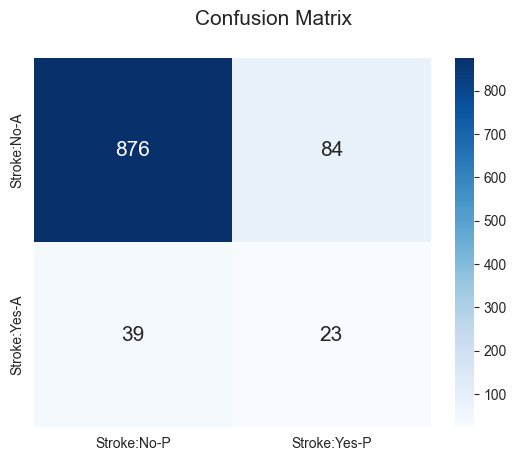

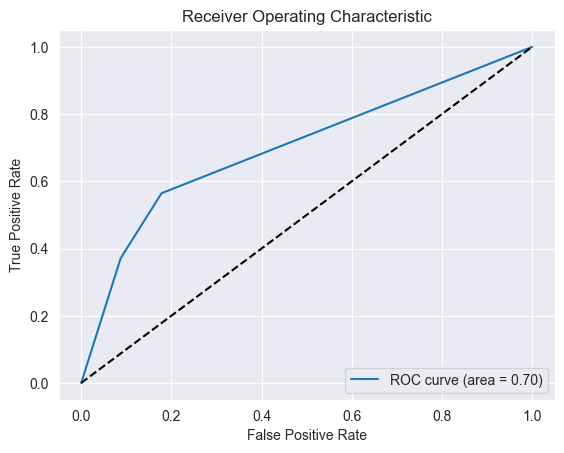

In [25]:
model_knn = KNeighborsClassifier(n_neighbors = 2)
model_knn.fit(X_train_sm, y_train_sm)
preds_knn = model_knn.predict(X_test)
KNN_score = scores(y_test, preds_knn)

y_scores = model_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

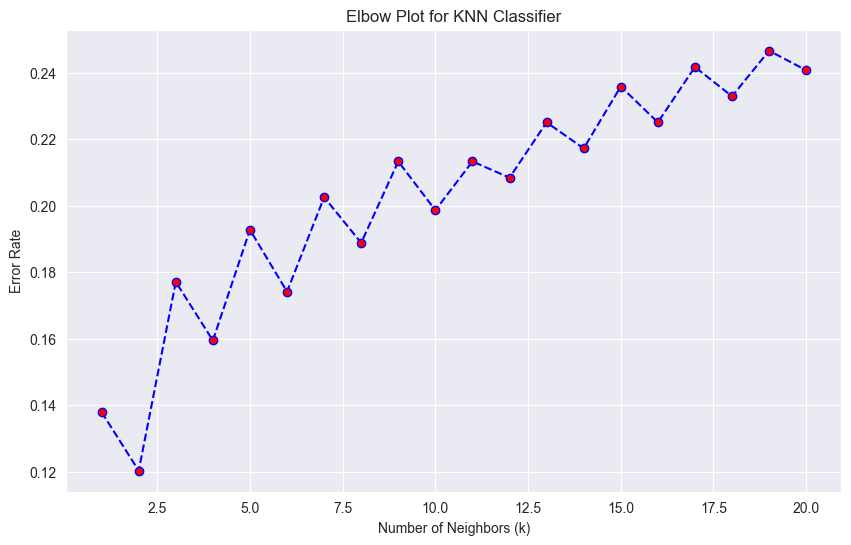

In [26]:
# List to store the error rates
error_rate = []

# Iterate over a range of k values (1 to 20 for this example)
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sm, y_train_sm)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plotting the elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red')
plt.title('Elbow Plot for KNN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.show()

##### K = 2 seems to be the best spot where we got high recall , precision and F1 score

# 2.) Classification using Decision Tree Classifier

accuracy: 90.607 %
recall: 22.581 %
precision: 22.581 %
f1: 22.581 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.23      0.23      0.23        62

    accuracy                           0.91      1022
   macro avg       0.59      0.59      0.59      1022
weighted avg       0.91      0.91      0.91      1022

--------------------------------------------------------------------------------


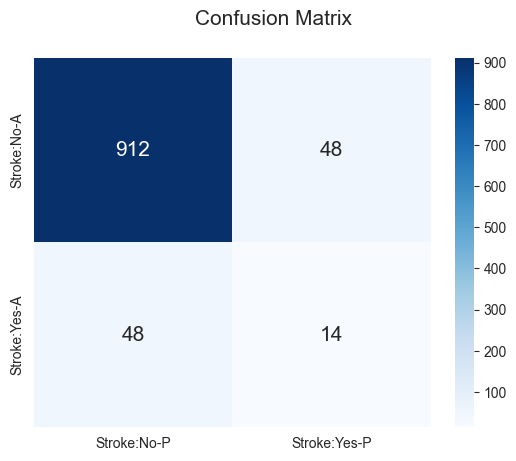

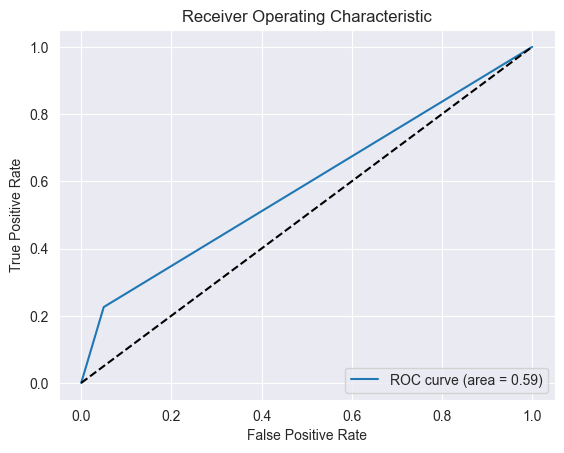

In [27]:
from sklearn.metrics import roc_curve, auc

model_dct = DecisionTreeClassifier()
model_dct.fit(X_train_sm, y_train_sm)
dct_preds = model_dct.predict(X_test)
dct_score = scores(y_test,dct_preds)

y_scores = model_dct.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 3.) Classification using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

accuracy: 82.192 %
recall: 45.161 %
precision: 15.909 %
f1: 23.529 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       960
           1       0.16      0.45      0.24        62

    accuracy                           0.82      1022
   macro avg       0.56      0.65      0.57      1022
weighted avg       0.91      0.82      0.86      1022

--------------------------------------------------------------------------------


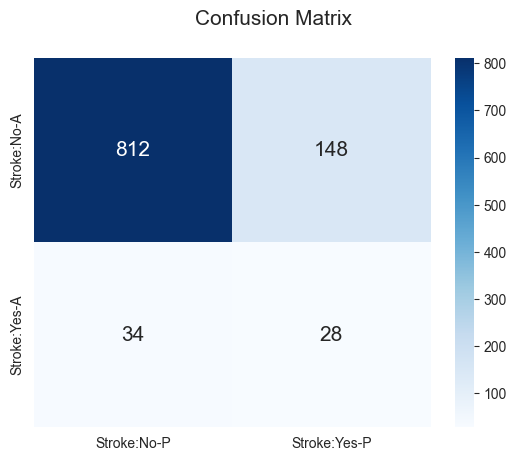

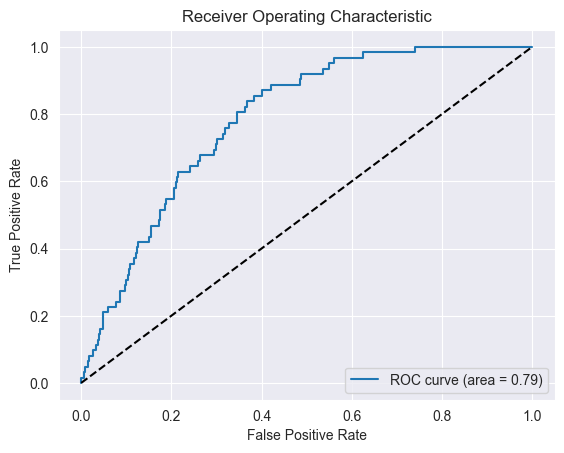

In [29]:
model_logreg = LogisticRegression(random_state = 3, max_iter = 100000,)
model_logreg.fit(X_train_sm, y_train_sm)
logreg_preds = model_logreg.predict(X_test)
logreg_scores = scores(y_test,logreg_preds)

y_scores = model_logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 4.) Classification using SVM Classifier

accuracy: 73.092 %
recall: 75.806 %
precision: 15.309 %
f1: 25.474 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.55      1022
weighted avg       0.93      0.73      0.80      1022

--------------------------------------------------------------------------------


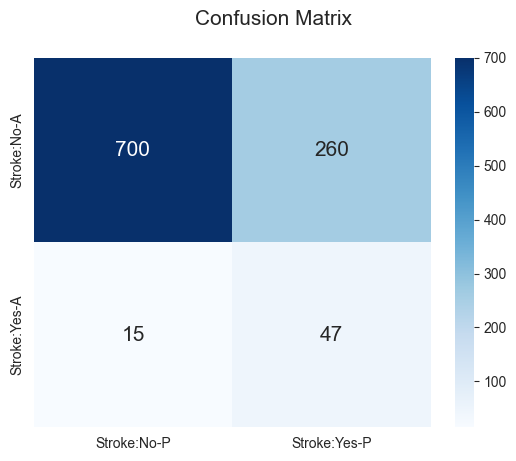

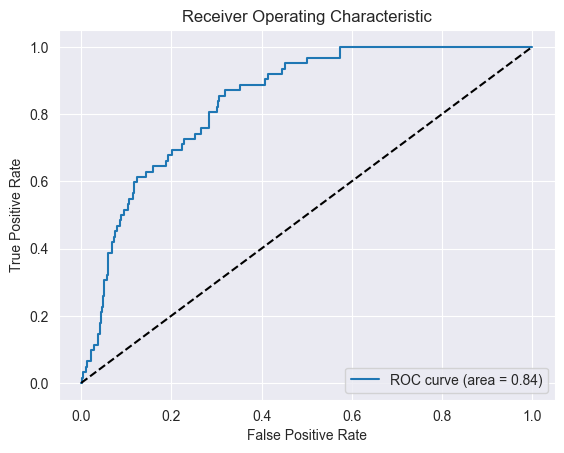

In [30]:
model_svc = SVC(C = 0.25, kernel = "rbf",probability=True)
model_svc.fit(X_train_sm, y_train_sm)
svm_preds = model_svc.predict(X_test)
svc_score = scores(y_test,svm_preds)

y_scores = model_svc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# 5.) Classification using Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

accuracy: 90.802 %
recall: 11.29 %
precision: 15.217 %
f1: 12.963 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.15      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022

--------------------------------------------------------------------------------


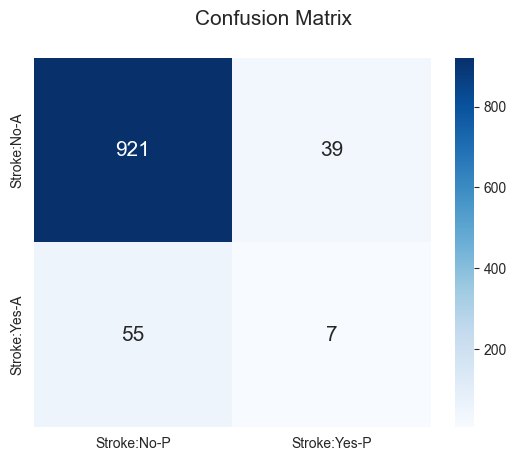

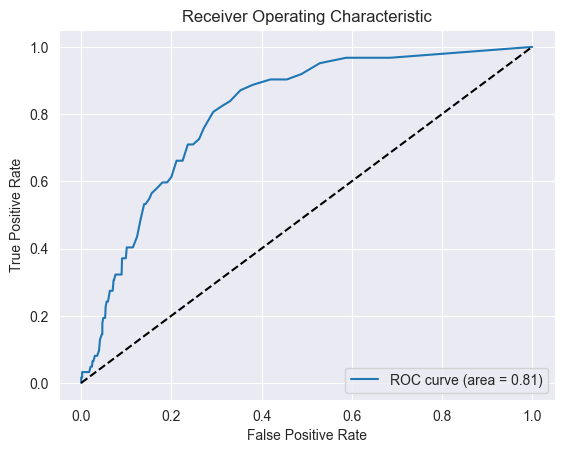

In [32]:
model_randForest = RandomForestClassifier(n_estimators=100, criterion='gini')
model_randForest.fit(X_train_sm, y_train_sm)
randForest_preds = model_randForest.predict(X_test)
randForest_scores = scores(y_test, randForest_preds)

# Use predict_proba to get probabilities for each class
y_scores = model_randForest.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


The shape of the curve: The curve bows towards the top-left corner, which is good because it indicates a high true positive rate (sensitivity) while keeping the false positive rate low.

**AUC** = 0.82: This is a good score, suggesting that the model can distinguish between the classes with reasonably high accurac

# 6.) Classification using XGBoost Classifier

In [33]:
#from xgboost import XGBClassifier  # For classification tasks

In [34]:
'''model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model_xgb.fit(X_train_sm, y_train_sm)
xgb_preds = model_xgb.predict(X_test)
xgb_score = scores(y_test, xgb_preds)
'''

'model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)\nmodel_xgb.fit(X_train_sm, y_train_sm)\nxgb_preds = model_xgb.predict(X_test)\nxgb_score = scores(y_test, xgb_preds)\n'

# Comparison

In [35]:
score_names = ['accuracy','recall','precision','f1 score']
all_score = [KNN_score , dct_score, logreg_scores, svc_score, randForest_scores]
score_df = pd.DataFrame(all_score, columns = score_names,
                       index = ['KNN','DecisionTree','Logistic Regression','SVM', 'RandomForest'])
score_df.style.highlight_max(color = 'green', axis = 0)

# display(score_df)

,accuracy,recall,precision,f1 score
KNN,87.965000,37.097000,21.495000,27.219000
DecisionTree,90.607000,22.581000,22.581000,22.581000
Logistic Regression,82.192000,45.161000,15.909000,23.529000
SVM,73.092000,75.806000,15.309000,25.474000
RandomForest,90.802000,11.290000,15.217000,12.963000


### From the above table it can been be observed that random forest classifier has the highest accuracy 90%. But in case of medical disease prediction, accuracy does not play major role. For this task recall value should be high, i.e. if a person has disease, model should be able to predict it correctly. SVM Classifier works the best in this regard with a recall value of 75%.

In [36]:
#Pickling the Models
import pickle

In [37]:
# Example models
model_svc = SVC(C=0.25, kernel="rbf", probability=True)
model_knn = KNeighborsClassifier(n_neighbors=2)
model_randForest = RandomForestClassifier(n_estimators=100, criterion='gini')

# Train the models
model_svc.fit(X_train_sm, y_train_sm)
model_knn.fit(X_train_sm, y_train_sm)
model_randForest.fit(X_train_sm, y_train_sm)

# Serialize (pickle) the models
with open('model_svc.pkl', 'wb') as svc_file:
    pickle.dump(model_svc, svc_file)

with open('model_knn.pkl', 'wb') as knn_file:
    pickle.dump(model_knn, knn_file)

with open('model_randomforest.pkl', 'wb') as rf_file:
    pickle.dump(model_randForest, rf_file)


In [40]:
# Load the models back
with open('model_svc.pkl', 'rb') as svc_file:
    loaded_svc = pickle.load(svc_file)

with open('model_knn.pkl', 'rb') as knn_file:
    loaded_knn = pickle.load(knn_file)

with open('model_randomforest.pkl', 'rb') as rf_file:
    loaded_randomforest = pickle.load(rf_file)

# Now you can use the loaded models
svc_preds = loaded_svc.predict(X_test)
knn_preds = loaded_knn.predict(X_test)
rf_preds = loaded_randomforest.predict(X_test)



[0 0 0 ... 0 0 0]
